## Car Insurance Claims Predictor

In [ ]:
#Run the below section to install dependent libraries!

In [2]:
pip install numpy; pandas; matplotlib; seaborn; scipy; statsmodels; scikit-learn;

Note: you may need to restart the kernel to use updated packages.


### 1) Importing Necessary Libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import kstest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc

import warnings
warnings.filterwarnings('ignore')
pd.set_option('future.no_silent_downcasting', True)

### 2) Reading and Loading Data

In [2]:
car_df = pd.read_csv(r".\Datasets\car_insurance.csv")
car_df.head(7)

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
5,877557,2,0,20-29y,high school,upper class,0.619127,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,930134,3,1,30y+,high school,upper class,0.492944,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0


In [3]:
car_df.columns

Index(['id', 'age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

In [4]:
car_df.shape

(10000, 18)

### 3) Data Cleaning

In [5]:
car_df.describe()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [7]:
# We can see that there are 5 categorical columns and 12 numerical columns
# We can also notice that credit_score and annual_mileage is having some missing values

In [8]:
car_df.nunique()

id                     10000
age                        4
gender                     2
driving_experience         4
education                  3
income                     4
credit_score            9018
vehicle_ownership          2
vehicle_year               2
married                    2
children                   2
postal_code                4
annual_mileage            21
vehicle_type               2
speeding_violations       21
duis                       7
past_accidents            15
outcome                    2
dtype: int64

In [9]:
car_df.isnull().sum()

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

In [10]:
# Both the metrics that have missing values are important to calculating insurance claim

In [11]:
car_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [12]:
car_df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [13]:
# There are no duplicates

In [14]:
# As the ID is unique and postal_code is unnecessary they are redundant data and are to be removed

In [15]:
car_df = car_df.drop(['id','postal_code'],axis=1)
car_df.head()

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0


In [16]:
# handling the missing data

In [17]:
car_df_copy = car_df.copy()

In [18]:
# Plotting the graphs to see current distributions

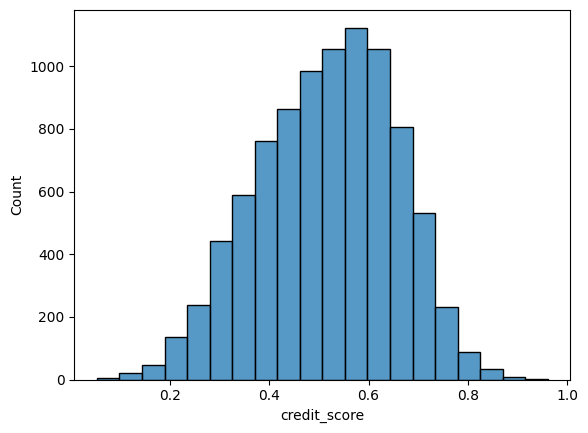

In [19]:
sns.histplot(data=car_df_copy, x=car_df_copy['credit_score'], bins = 20)
plt.show()

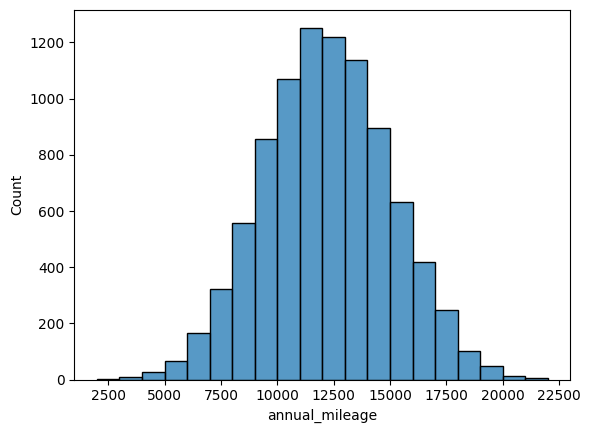

In [20]:
sns.histplot(data=car_df_copy, x=car_df_copy['annual_mileage'], bins = 20)
plt.show()

In [21]:
#Let's see how the data looks if we use the mean of the missing column

In [22]:
car_df_copy['credit_score'] = car_df_copy['credit_score'].fillna((car_df_copy['credit_score'].mean()))
car_df_copy['annual_mileage'] = car_df_copy['annual_mileage'].fillna((car_df_copy['annual_mileage'].mean()))

In [23]:
car_df_copy.isnull().sum()

age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

In [24]:
# We now have no missing values
# Let us check the distribution plot

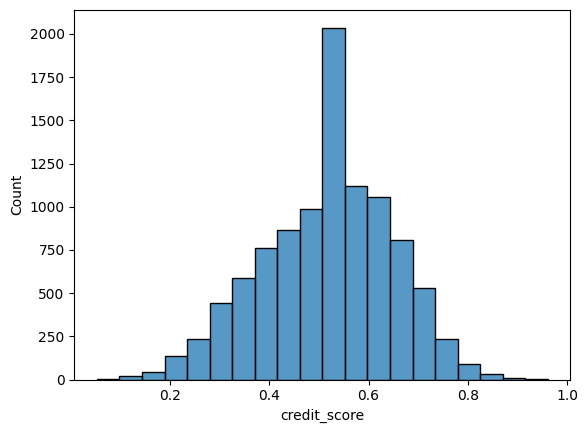

In [25]:
sns.histplot(data=car_df_copy, x=car_df_copy['credit_score'], bins = 20)
plt.show()

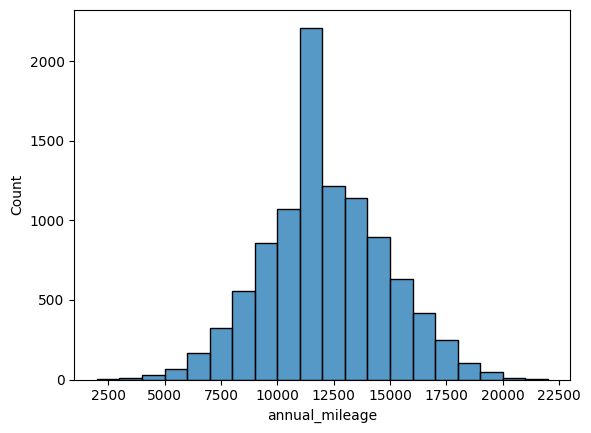

In [26]:
sns.histplot(data=car_df_copy, x=car_df_copy['annual_mileage'], bins = 20)
plt.show()

In [27]:
# The missing values are disturbing the distribution

In [28]:
car_df_copy2 = car_df.copy()

In [29]:
# Let us check for median substitution

In [30]:
car_df_copy2['credit_score'] = car_df_copy2['credit_score'].fillna((car_df_copy2['credit_score'].median()))
car_df_copy2['annual_mileage'] = car_df_copy2['annual_mileage'].fillna((car_df_copy2['annual_mileage'].median()))

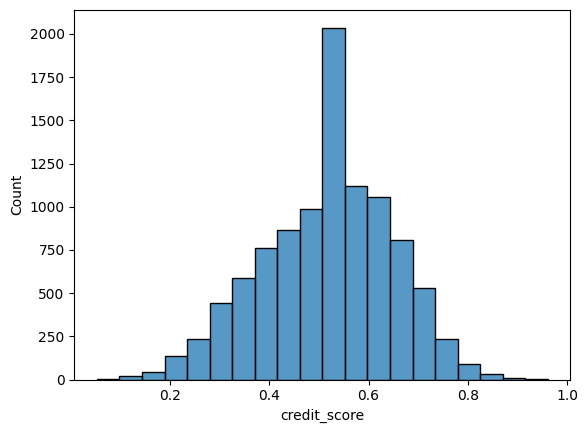

In [31]:
sns.histplot(data=car_df_copy2, x=car_df_copy2['credit_score'], bins = 20)
plt.show()

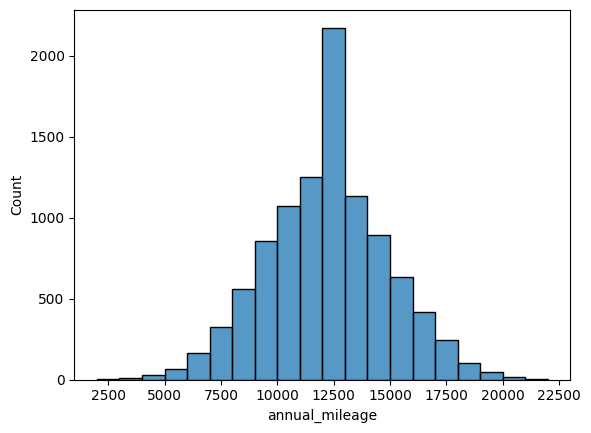

In [32]:
sns.histplot(data=car_df_copy2, x=car_df_copy2['annual_mileage'], bins = 20)
plt.show()

In [33]:
# The distribution is still being disturbed

In [34]:
# It would be better to drop the missing values

In [35]:
car_df.dropna(subset=['credit_score','annual_mileage'],inplace=True)
car_df.isnull().sum()

age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

In [36]:
car_df

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1,1,10-19y,high school,middle class,0.454300,1.0,before 2015,0.0,0.0,16000.0,sedan,1,0,2,0.0
9995,1,0,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,16000.0,sedan,0,0,1,0.0
9997,1,1,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,14000.0,sedan,0,0,0,0.0
9998,1,0,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,13000.0,sedan,2,0,1,1.0


In [37]:
del car_df_copy
del car_df_copy2
car_df

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1,1,10-19y,high school,middle class,0.454300,1.0,before 2015,0.0,0.0,16000.0,sedan,1,0,2,0.0
9995,1,0,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,16000.0,sedan,0,0,1,0.0
9997,1,1,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,14000.0,sedan,0,0,0,0.0
9998,1,0,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,13000.0,sedan,2,0,1,1.0


In [38]:
# Creating a dataframe with only object columns

object_df = car_df.select_dtypes(include=['object']).copy()
object_df

,driving_experience,education,income,vehicle_year,vehicle_type
0,0-9y,high school,upper class,after 2015,sedan
1,0-9y,none,poverty,before 2015,sedan
2,0-9y,high school,working class,before 2015,sedan
3,0-9y,university,working class,before 2015,sedan
4,10-19y,none,working class,before 2015,sedan
...,...,...,...,...,...
9994,10-19y,high school,middle class,before 2015,sedan
9995,10-19y,university,upper class,before 2015,sedan
9997,0-9y,high school,middle class,before 2015,sedan
9998,10-19y,high school,poverty,before 2015,sedan


In [39]:
#Encoding the data

# Driving Experience:
# 0-9y -> 0
# 10-19y -> 1
# 20-29y -> 2
# 30y+ -> 3

drivingexperience = {"0-9y": 0, "10-19y": 1, "20-29y": 2, "30y+": 3}
object_df = object_df.replace(drivingexperience)

# Education: 
# None -> 0
# High School -> 1
# university -> 2

education = {"none": 0, "high school": 1, "university": 2}
object_df = object_df.replace(education)

# Income:
# poverty -> 0
# working class -> 1
# middle class -> 2
# upper class -> 3

income = {"poverty": 0, "working class": 1, "middle class": 2, "upper class":3}
object_df = object_df.replace(income)

# Vehicle Year:
# before 2015 -> 0
# after 2015 -> 1

year = {"before 2015": 0, "after 2015": 1}
object_df = object_df.replace(year)

# Vehicle Type:
# sedan -> 0
# sports car -> 1

cartype = {"sedan": 0, "sports car": 1}
object_df = object_df.replace(cartype)

In [40]:
# Check if object dataframe is properly encoded, then merge it onto the original dataframe

object_df.head()

,driving_experience,education,income,vehicle_year,vehicle_type
0,0,1,3,1,0
1,0,0,0,0,0
2,0,1,1,0,0
3,0,2,1,0,0
4,1,0,1,0,0


In [41]:
object_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   driving_experience  8149 non-null   object
 1   education           8149 non-null   object
 2   income              8149 non-null   object
 3   vehicle_year        8149 non-null   object
 4   vehicle_type        8149 non-null   object
dtypes: object(5)
memory usage: 382.0+ KB


In [42]:
# Convert everything to numerical

object_df = object_df.apply(lambda col: pd.to_numeric(col, errors='coerce'))
object_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   driving_experience  8149 non-null   int64
 1   education           8149 non-null   int64
 2   income              8149 non-null   int64
 3   vehicle_year        8149 non-null   int64
 4   vehicle_type        8149 non-null   int64
dtypes: int64(5)
memory usage: 382.0 KB


In [43]:
# Merging with original dataframe

car_df[object_df.columns] = object_df
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  8149 non-null   int64  
 1   gender               8149 non-null   int64  
 2   driving_experience   8149 non-null   int64  
 3   education            8149 non-null   int64  
 4   income               8149 non-null   int64  
 5   credit_score         8149 non-null   float64
 6   vehicle_ownership    8149 non-null   float64
 7   vehicle_year         8149 non-null   int64  
 8   married              8149 non-null   float64
 9   children             8149 non-null   float64
 10  annual_mileage       8149 non-null   float64
 11  vehicle_type         8149 non-null   int64  
 12  speeding_violations  8149 non-null   int64  
 13  duis                 8149 non-null   int64  
 14  past_accidents       8149 non-null   int64  
 15  outcome              8149 non-null   float6

In [44]:
car_df.head()

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0,1,3,0.629027,1.0,1,0.0,1.0,12000.0,0,0,0,0,0.0
1,0,1,0,0,0,0.357757,0.0,0,0.0,0.0,16000.0,0,0,0,0,1.0
2,0,0,0,1,1,0.493146,1.0,0,0.0,0.0,11000.0,0,0,0,0,0.0
3,0,1,0,2,1,0.206013,1.0,0,0.0,1.0,11000.0,0,0,0,0,0.0
4,1,1,1,0,1,0.388366,1.0,0,0.0,0.0,12000.0,0,2,0,1,1.0


### 4) Data Analysis

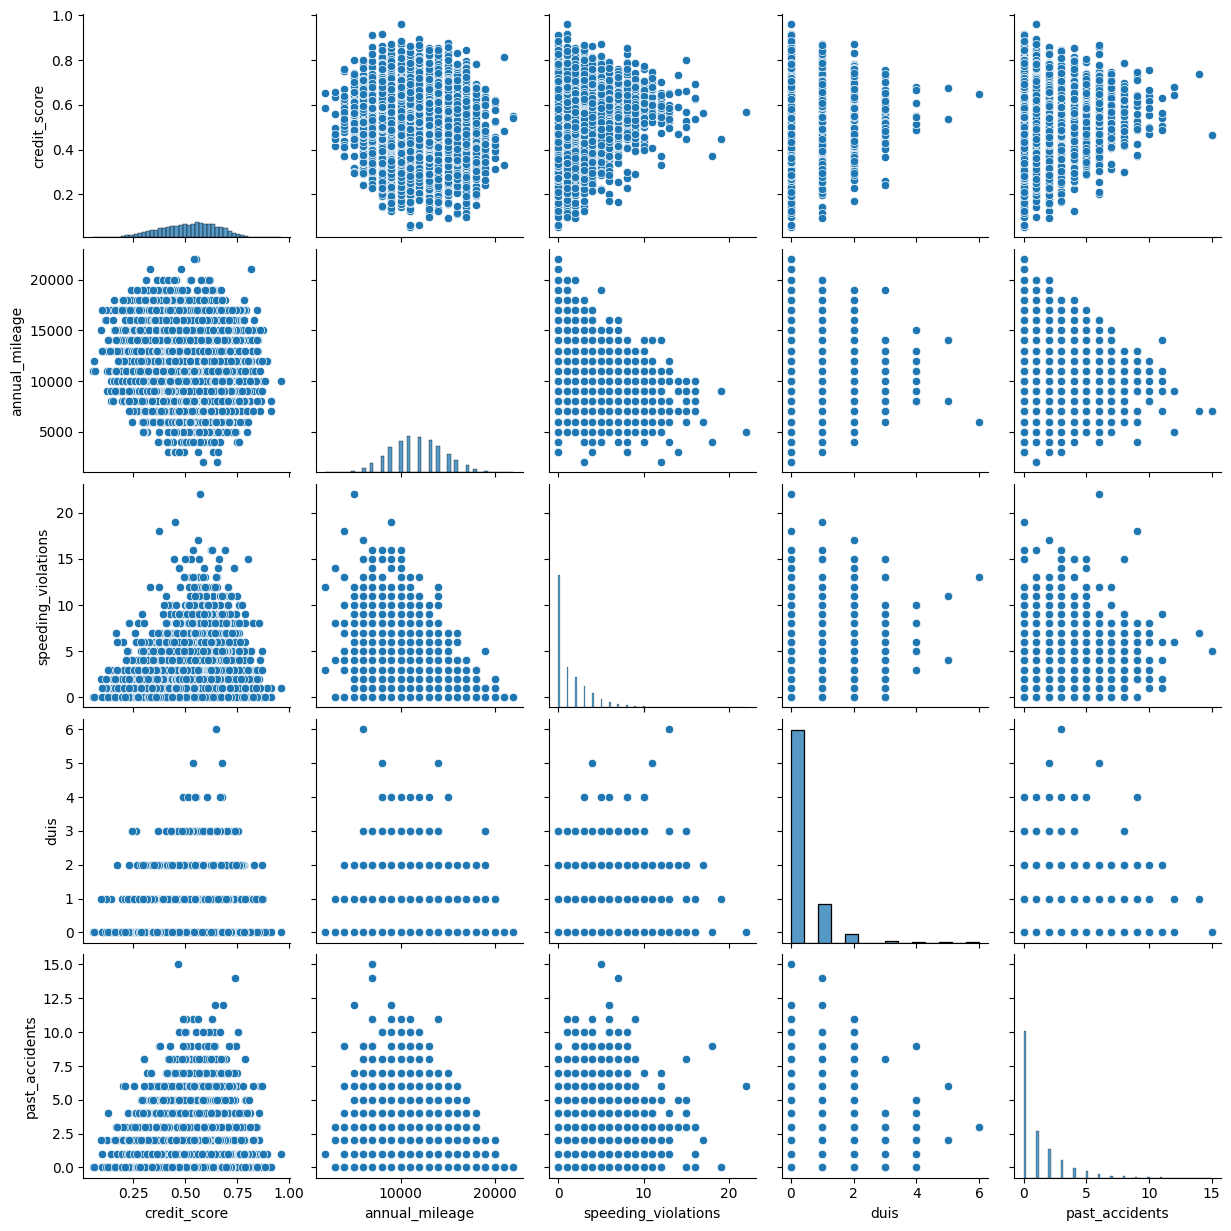

In [45]:
numericaldata = car_df[['credit_score','annual_mileage','speeding_violations','duis','past_accidents']]

sns.pairplot(numericaldata)
plt.show()

In [46]:
# While there are a few outliers, we can't fina a linear relationship, hence we are keeping them as is.
# We have to find the count for the target variable

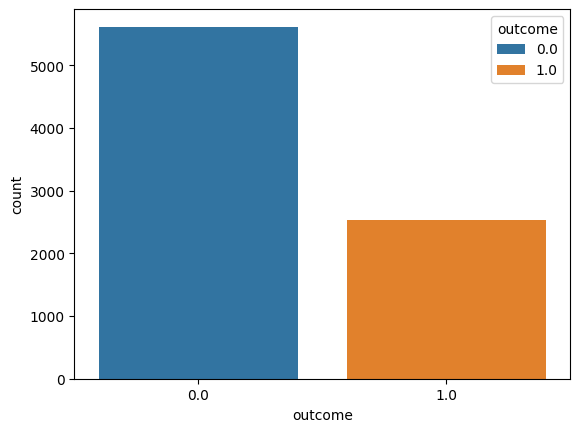

In [47]:
sns.countplot(x='outcome', data=car_df, hue = 'outcome')
plt.show()

In [48]:
# Here in the outcome: 0 -> Not made a claim, 1-> Made a claim

In [49]:
# We how to compare the independent variables to the outcome using regression plot
# So that we can establish the type of regression curve

# From the dataset columns we can say that there are 6 independent variables:
# credit_score,annual_mileage,age,driving_experience,past_accidents,vehicle_ownership

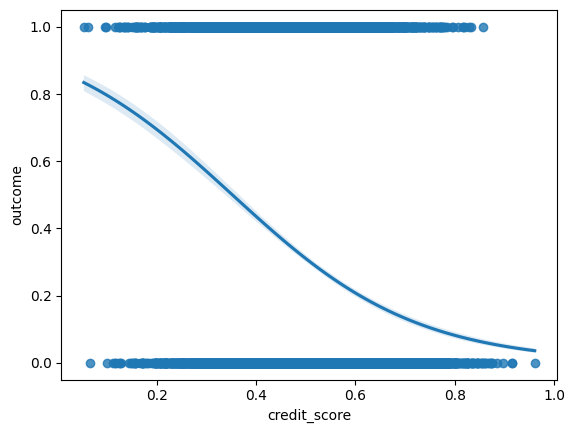

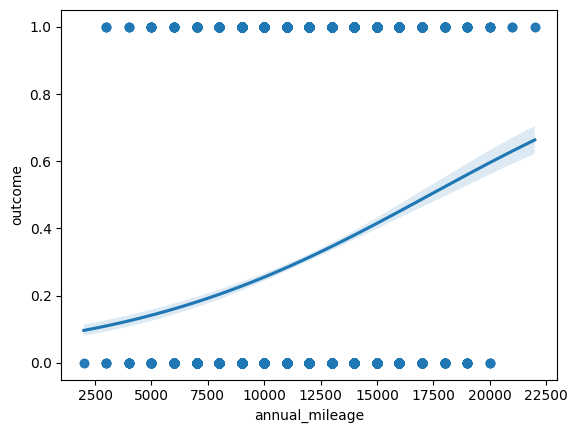

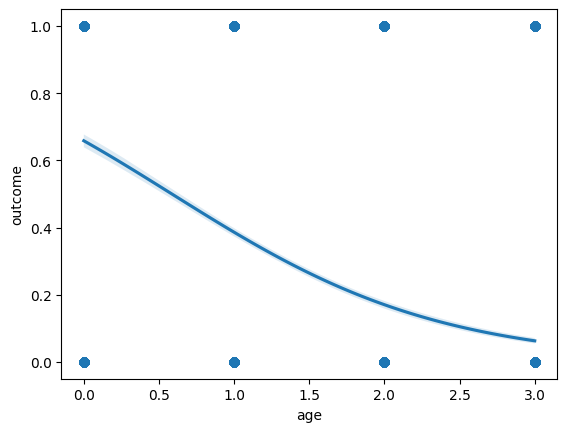

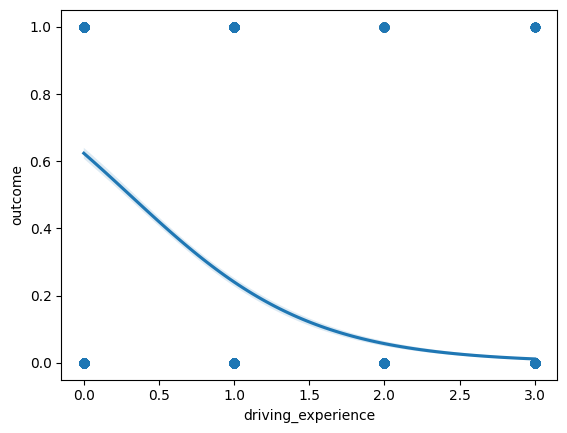

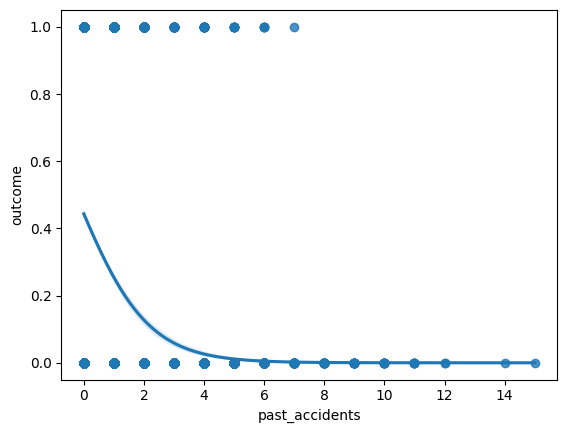

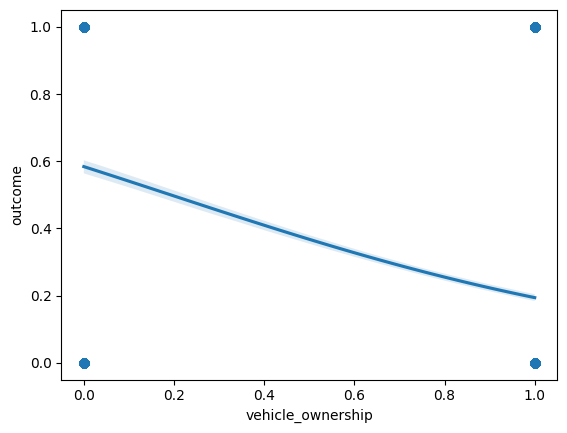

In [50]:
independentvariable = ['credit_score','annual_mileage','age','driving_experience','past_accidents','vehicle_ownership']

for col in independentvariable:
    sns.regplot(x=col,y='outcome',data=car_df, logistic=True)
    plt.show()

In [51]:
#The above plots show the relation between the independent variables and outcome

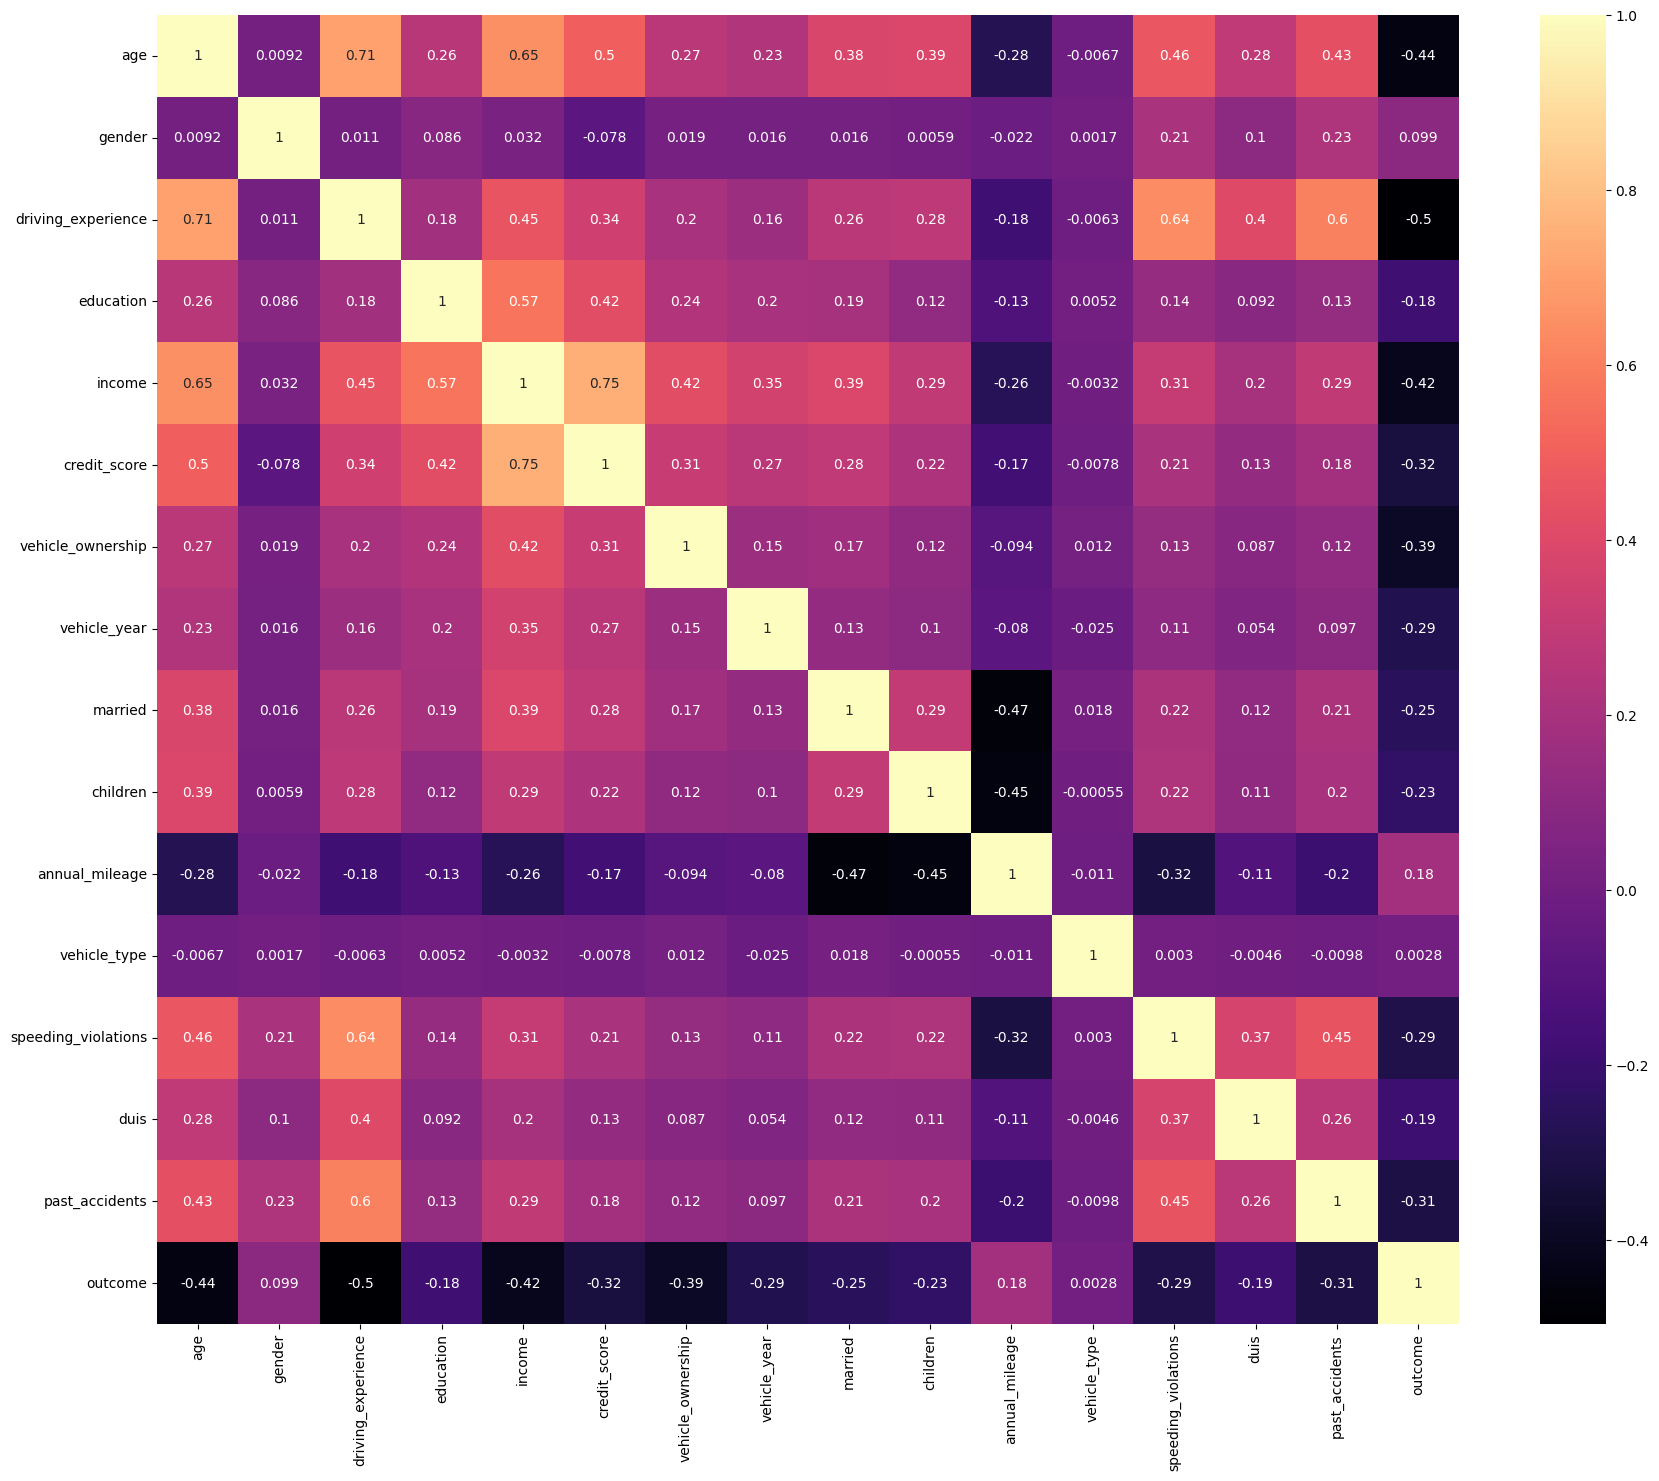

In [52]:
heatmapfig = plt.figure(figsize=(21,17))
sns.heatmap(car_df.corr(),annot=True,cmap="magma")
plt.show()

In [53]:
#We can see that there is too much correlation among the various columns

### 5) Data Prediction Models

In [54]:
# We can build a Simple Logistic Regression Model

In [55]:
numericaldata.head()

,credit_score,annual_mileage,speeding_violations,duis,past_accidents
0,0.629027,12000.0,0,0,0
1,0.357757,16000.0,0,0,0
2,0.493146,11000.0,0,0,0
3,0.206013,11000.0,0,0,0
4,0.388366,12000.0,2,0,1


In [56]:
#Data Scaling

In [57]:
scaler = StandardScaler()

car_df[numericaldata.columns] = scaler.fit_transform(car_df[numericaldata.columns])

#### 5.1) Linear Regression Model

In [58]:
    model,model1,model2= [],[],[]
    result = []
    features = car_df.drop(['outcome'],axis = 1)
    outcome = car_df['outcome']

In [59]:
# Split data into training and testing set

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(features,outcome,test_size=0.3, random_state=42)

LRmodel = LogisticRegression()
LRmodel.fit(X_train,Y_train)
Y_LRpred = LRmodel.predict(X_test)
Y_LRpred2 = LRmodel.predict(X_train)
            
trainingaccuracy = accuracy_score(Y_train,Y_LRpred2)
testingaccuracy = accuracy_score(Y_test,Y_LRpred)
confusionmatrix = confusion_matrix(Y_test,Y_LRpred)

print(f"Accuracy: {testingaccuracy}")
print(f"Training Accuracy: {trainingaccuracy}")
print(f"Confusion Matrix: \n{confusionmatrix}")

Accuracy: 0.8441717791411043
Training Accuracy: 0.842741935483871
Confusion Matrix: 
[[1526  162]
 [ 219  538]]


In [88]:
# [[True Positive, False Negative]
#  [False Positive, True Negative]]

#### 5.2) Decision Tree Method

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(features,outcome,test_size=0.3, random_state=42)

DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train,Y_train)
Y_DTpred = DTmodel.predict(X_test)
Y_DTpred2 = DTmodel.predict(X_train)

trainingaccuracy1 = accuracy_score(Y_train,Y_DTpred2)
testingaccuracy1 = accuracy_score(Y_test,Y_DTpred)
confusionmatrix1 = confusion_matrix(Y_test,Y_DTpred)

print(f"Accuracy: {testingaccuracy1}")
print(f"Training Accuracy: {trainingaccuracy1}")
print(f"Confusion Matrix: \n{confusionmatrix1}")

Accuracy: 0.7591002044989775
Training Accuracy: 1.0
Confusion Matrix: 
[[1376  312]
 [ 277  480]]


#### 5.3) Support Vector Machine Method

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(features,outcome,test_size=0.3, random_state=42)

SVmodel= SVC(kernel="linear",probability=True)
SVmodel.fit(X_train,Y_train)
Y_SVpred = SVmodel.predict(X_test)
Y_SVpred2 = SVmodel.predict(X_train)

trainingaccuracy2 = accuracy_score(Y_train,Y_SVpred2)
testingaccuracy2 = accuracy_score(Y_test,Y_SVpred)
confusionmatrix2 = confusion_matrix(Y_test,Y_SVpred)

print(f"Accuracy: {testingaccuracy2}")
print(f"Training Accuracy: {trainingaccuracy2}")
print(f"Confusion Matrix: \n{confusionmatrix2}")

Accuracy: 0.8408997955010225
Training Accuracy: 0.8404628330995793
Confusion Matrix: 
[[1491  197]
 [ 192  565]]


#### 5.4) Accuracy Comparision

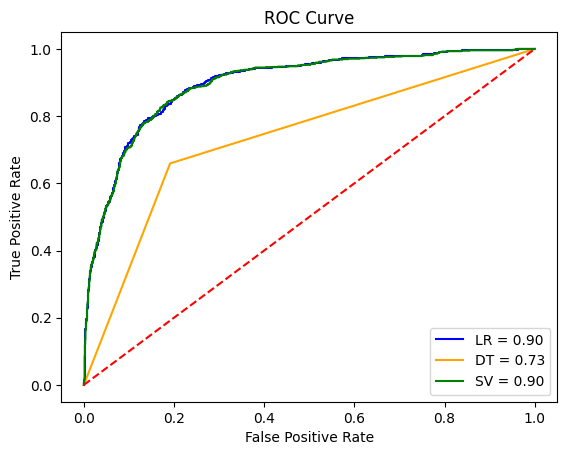

In [142]:
Y_LRscores = LRmodel.predict_proba(X_test)[:, 1]
Y_DTscores = DTmodel.predict_proba(X_test)[:, 1]
Y_SVscores = SVmodel.predict_proba(X_test)[:, 1]
Y_true = Y_test


fpr, tpr, _ = roc_curve(Y_true, Y_LRscores)
fpr2, tpr2, _ = roc_curve(Y_true, Y_DTscores)
fpr3, tpr3, _ = roc_curve(Y_true, Y_SVscores)

roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

plt.plot(fpr, tpr, color='blue', label=f'LR = {roc_auc:.2f}')
plt.plot(fpr2, tpr2, color='orange', label=f'DT = {roc_auc2:.2f}')
plt.plot(fpr3, tpr3, color='green', label=f'SV = {roc_auc3:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='red') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


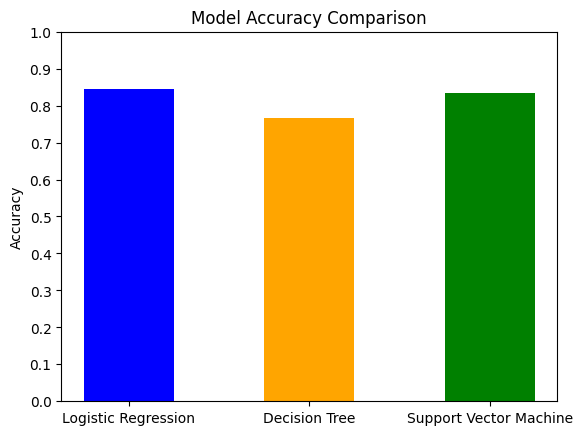

In [146]:
modellist = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine']
accuracylist = [accuracy,accuracy1,accuracy2]
colors = ['blue', 'orange', 'green']

plt.bar(modellist, accuracylist, color = colors, width = 0.5)
plt.xlabel('')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

In [147]:
# We can see that the Logistic Regression is the best model, albeit slightly higher accuracy than SVM

In [65]:
#Testing the model by making new data into appropriate dimension

In [66]:
a=X_test.values.reshape(-1,X_test.shape[1])[231]
print(a)
a=a.reshape(-1,15)
a.shape

[ 2.          0.          2.          0.          2.          0.01022074
  0.          0.          1.          1.         -1.30872643  0.
 -0.21633557 -0.43196423  0.5610679 ]


(1, 15)

In [67]:
if (model.predict(a) == 1):
    print("Customer is likely to claim in the nearest future")
else:
    print("Customer is not likely to claim in the nearest future")

Customer is not likely to claim in the nearest future


In [68]:
Y_test.head()

3265    0.0
603     1.0
9998    1.0
9984    1.0
4695    0.0
Name: outcome, dtype: float64

### THE END!